In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper Parameters
TIME_STEP = 10       # rnn time step
INPUT_SIZE = 1      # rnn input size
CELL_SIZE = 32      # rnn cell size
LR = 0.02           # learning rate

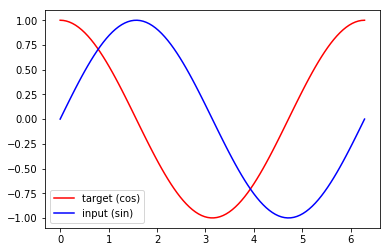

In [3]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps); y_np = np.cos(steps)    # float32 for converting torch FloatTensor
plt.plot(steps, y_np, 'r-', label='target (cos)'); plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best'); plt.show()

In [4]:
# tensorflow placeholders
tf_x = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])        # shape(batch, 5, 1)
tf_y = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])          # input y

In [5]:
# RNN
rnn_cell = tf.contrib.rnn.BasicRNNCell(num_units=CELL_SIZE)
init_s = rnn_cell.zero_state(batch_size=1, dtype=tf.float32)    # very first hidden state
outputs, final_s = tf.nn.dynamic_rnn(
    rnn_cell,                   # cell you have chosen
    tf_x,                       # input
    initial_state=init_s,       # the initial hidden state
    time_major=False,           # False: (batch, time step, input); True: (time step, batch, input)
)

In [6]:
outs2D = tf.reshape(outputs, [-1, CELL_SIZE])                       # reshape 3D output to 2D for fully connected layer
net_outs2D = tf.layers.dense(outs2D, INPUT_SIZE)
outs = tf.reshape(net_outs2D, [-1, TIME_STEP, INPUT_SIZE])          # reshape back to 3D

In [7]:
loss = tf.losses.mean_squared_error(labels=tf_y, predictions=outs)  # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())     # initialize var in graph

In [9]:
plt.figure(1, figsize=(12, 5)); plt.ion()       # continuously plot

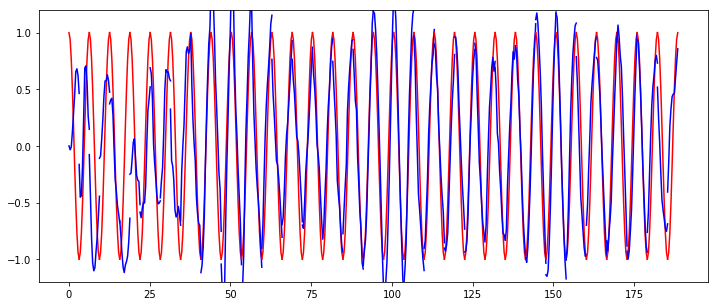

In [10]:
for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP)
    x = np.sin(steps)[np.newaxis, :, np.newaxis]    # shape (batch, time_step, input_size)
    y = np.cos(steps)[np.newaxis, :, np.newaxis]
    if 'final_s_' not in globals():                 # first state, no any hidden state
        feed_dict = {tf_x: x, tf_y: y}
    else:                                           # has hidden state, so pass it to rnn
        feed_dict = {tf_x: x, tf_y: y, init_s: final_s_}
    _, pred_, final_s_ = sess.run([train_op, outs, final_s], feed_dict)     # train

    # plotting
    plt.plot(steps, y.flatten(), 'r-'); plt.plot(steps, pred_.flatten(), 'b-')
    plt.ylim((-1.2, 1.2)); plt.draw(); plt.pause(0.05)

plt.ioff(); plt.show()